In [1]:
%matplotlib inline

# Como funciona una red neuronal - regresión lineal con bias

Hemos visto el ejemplo simple de la regresión lineal, pero supongamos ahora que tenemos la siguiente distribución de puntos

In [2]:
import numpy as np

x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

y = np.array( [6.07031713,  6.47220049,  6.86303668,  7.30085821,  8.24477528,
       10.49489059, 10.65473628,  9.61305331, 11.66992533, 14.56519246,
       13.28530534, 13.75543872, 15.52665638, 13.56319578, 15.99458659,
       15.81156146, 16.76450246, 17.08632722, 19.15134441, 17.51520277,
       20.31192588, 19.37365485, 22.46353926, 21.13072511, 22.46952069,
       23.77019966, 23.62918563, 23.80804221, 25.23849617, 27.19920037])

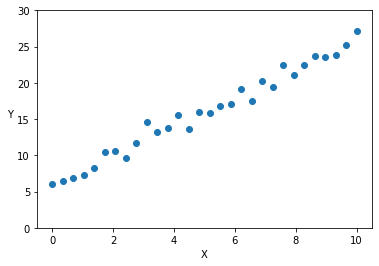

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.ylim([0, 30])
plt.show()

Si nos fijamos ahora, la recta que se asemejaría a los puntos no acaba en `(0,0)`, por lo que la neurona anterior no nos vale, tenemos que usar una neurona distinta

![red neuronal regresion bias](Imagenes/red_neuronal_regresion_bias.png)

Ahora la neurona calcula una recta donde hay una pendiente `a` y el valor `b` que se puede llamar bias o sesgo.

Poco a poco nos estamos acercando a cómo es de verdad una neurona en una red neuronal

## Inicialización aleatoria de los parámetros

Como ya hemos explicado lo primero que tenemos que hacer es inicializar aleatoriamente los dos parámetros `a` y `b`

In [4]:
import random

random.seed(45) # Esto es una semilla, cuando se generan números aleatorios, 
                # pero queremos que siempre se genere el mismo se suele fijar
                # un número llamado semilla. Esto hace que siempre a sea el mismo

a = random.random()
b = random.random()

print(f'Los parámetros inicializados aleatoriamente son a = {a} y b = {b}')

Los parámetros inicializados aleatoriamente son a = 0.2718754143840908 y b = 0.48802820785090784


Vamos a ver qué recta saldría con estos parámetros

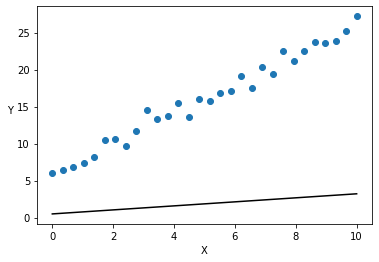

In [5]:
def model(x, a, b):
    return a*x + b
z = model(x, a, b)

plt.scatter(x, y)
plt.plot(x, z, 'k')
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.show()

No se asemeja en nada la salida de nuestra neurona con los puntos

## Cálculo del error o loss

Necesitamos una manera de saber cómo de bien o mal se comporta nuestra neurona, para ello, al igual que antes calcularemos el error mediante el error cuadrático medio (ECM) o mean squared error (MSE)

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

In [6]:
def loss(x, y, a, b):
    return ((y-model(x, a, b))**2).mean()

In [8]:
error = loss(x, y, a, b)
error

227.47785104340105

Es un valor muy alto, recordar que queremos buscar un valor cercano a 0.

Vamos a ver cómo evoluciona el error en función de los dos parámetros `a` y `b`

Text(0.5, 0, 'loss')

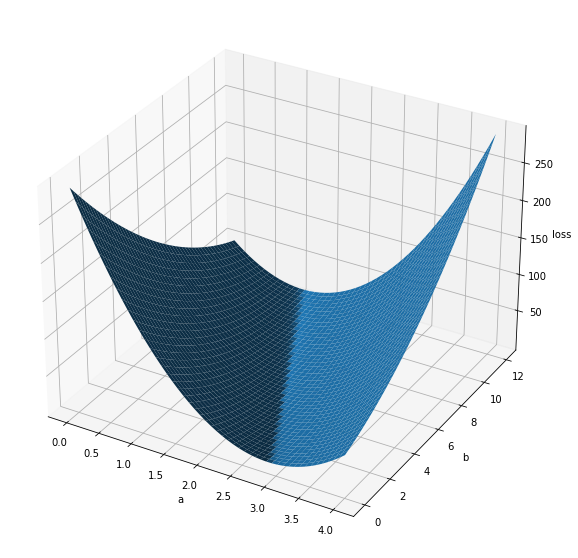

In [11]:
import matplotlib.pyplot as plt

# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar
N = 50
posibles_a = np.linspace(0, 4, N)
posibles_b = np.linspace(0, 12, N)
A, B = np.meshgrid(posibles_a, posibles_b)

def LOSS(x, y, A, B):
    L = np.empty((len(A), len(A)))

    for i in range(len(A)):
        for j in range(len(B)):
            L[i, j] = loss(x, y, A[i, j], B[i, j])
    
    return L
Z = LOSS(x, y, A, B)

# Se termina de configurar la figura
ax.plot_surface(A, B, Z)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('loss')

Como se puede ver ahora es más dificil encontrar el mínimo error en función de los parámetros. Se empieza a ver la importancia del bucle de entrenamiento

## Descenso del gradiente

Al igual que antes buscamos el mínimo de la función de pérdida mediante el descenso del gradiente, pero en este caso, como tenémos dos parámetros, tendremos que hacer el descenso mediante el gradiente de la función de error con respecto a `a` y mediante el gradiente de la función de error con respecto a `b`

Como la función de pérdida era

$$loss = \frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}$$

Los dos gradientes se calculan mediante

$$\frac{\partial loss}{\partial a} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial a} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(ax+b\right)-y\right)^2}{N}\right)}{\partial a} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(ax+b\right)-y\right) x} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z-y\right) x}$$

$$\frac{\partial loss}{\partial b} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(z-y\right)^2}{N}\right)}{\partial b} = 
    \frac{\partial \left(\frac{\sum_{i=1}^{N} \left(\left(ax+b\right)-y\right)^2}{N}\right)}{\partial b} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(\left(ax+b\right)-y\right)} = 
    \frac{2}{N}\sum_{i=1}^{N} {\left(z-y\right)}$$

In [13]:
def gradiente_a (z, x, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto a en un punto
    n = len(y)
    return 2*np.sum((z - y)*x)/n

def gradiente_b (z, y):
    # Función que calcula el valor del gradiente de la función de pérdida con respecto b en un punto
    n = len(y)
    return 2*np.sum((z - y))/n

## Bucle de entrenamiento

Una vez que sabemos calcular los gradientes actualizamos los parámetros `a` y `b` mediante las siguientes fórmulas

$$a' = a - \alpha\frac{\partial loss}{\partial a}$$

$$b' = b - \alpha\frac{\partial loss}{\partial b}$$

Recordemos que $\alpha$ es la tasa de aprendizaje o learning rate, que determina la velocidad a la que va a aprender la red

In [14]:
lr = 10**-2 # Tasa de aprendizaje o learning rate
steps = 100  # Numero de veces que se realiza el bucle de enrtenamiento

# Calculamos los valores que obtiene la red neuronal
z = a*x + b

for i in range(steps):
    # Calculamos los gradientes
    dl_a = gradiente_a(z, x, y)
    dl_b = gradiente_b(z, y)

    # Corregimos el valor de a y b
    a = a - lr*dl_a
    b = b - lr*dl_b

    # Calculamos los nuevos valores que obtiene la red neuronal
    z = a*x + b

    # Obtenemos el error
    error = loss(y, z)

    # Imprimimos la evolución del entrenamiento
    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, gradiente_a={dl_a}, gradiente_b={dl_b}, a={a}, b={b}")

i=10: error=7.035498326852326, gradiente_a=0.3704707321541548, gradiente_b=-2.522089379136795, a=2.7245322605135223, b=1.1162445890476504
i=20: error=6.422813239221936, gradiente_a=0.35582685427324373, gradiente_b=-2.394783737485804, a=2.68812904026689, b=1.361372648583844
i=30: error=5.870147109543946, gradiente_a=0.33794928596695756, gradiente_b=-2.2744640327174466, a=2.6535372223933655, b=1.594182271703275
i=40: error=5.37162043880994, gradiente_a=0.32096990023127886, gradiente_b=-2.160189483968323, a=2.6206833805985226, b=1.8152949788513435
i=50: error=4.921929697714698, gradiente_a=0.3048435997123941, gradiente_b=-2.0516563636630227, a=2.589480194910689, b=2.0252984512660555
i=60: error=4.516290893417533, gradiente_a=0.28952752335547605, gradiente_b=-1.9485762086140643, a=2.5598447323931137, b=2.2247508436457664
i=70: error=4.150388675482427, gradiente_a=0.2749809635479946, gradiente_b=-1.8506750487190269, a=2.531698226859448, b=2.4141822676530356
i=80: error=3.8203304274264793, g

Vamos a ver cómo es la salida de nuestra neurona una vez la hemos entrenado

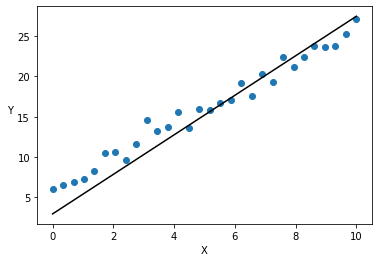

In [15]:
plt.scatter(x, y)
plt.plot(x, z, 'k')
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.show()

Como se puede ver ahora se asemeja mucho mejor a los puntos